In [1]:
# This notebook was AI-generated using dandi-notebook-gen and has NOT been manually verified. Please exercise caution when interpreting code or results.

# Dataset: NG-CANCAN Remote Targeting Electroporation

**Description:**  
Experiments using a four-electrode array to optimize CANCAN electroporation protocols by varying burst number on confluent cell monolayers. Hoechst and YoPro-1 staining assess cell integrity and membrane permeability.

**Contributors:**  
Giedre Silkuniene, Mantas Silkunas, Andrei Pakhomov, NIH  

**License:** CC-BY-4.0  
**Version:** Draft  
**Citation:** [DANDI:001276](https://dandiarchive.org/dandiset/001276/draft)  
**Date Created:** 2024-12-09

## Getting Dandiset metadata and listing assets
This connects to the DANDI Archive and fetches asset file details.

In [2]:
from dandi.dandiapi import DandiAPIClient

client = DandiAPIClient()
dandiset = client.get_dandiset("001276", "draft")
assets = list(dandiset.get_assets())
print(f"Number of assets in Dandiset: {len(assets)}")
print("First five assets/sample assets:")
for asset in assets[:5]:
    print(f" - {asset.path}")

Number of assets in Dandiset: 108
First five assets/sample assets:
 - sub-P1-20240627-A2/sub-P1-20240627-A2_obj-fniblx_image.nwb
 - sub-P1-20240627-A3/sub-P1-20240627-A3_obj-1h4rh2m_image.nwb
 - sub-P1-20240627-A2/sub-P1-20240627-A2_obj-1aoyzxh_image.nwb
 - sub-P1-20240627-A3/sub-P1-20240627-A3_obj-k9o87l_image.nwb
 - sub-P1-20240627-B1/sub-P1-20240627-B1_obj-1qpzwid_image.nwb


## Selecting an NWB file for analysis
Here, for illustration, we use a representative single NWB imaging file from the Dandiset (sub-P1-20240702-A1).  
Because the fluorescence images are very large (>19k x 19k pixels), we demonstrate loading only a small center crop to enable quick exploration.

In [3]:
import remfile
import h5py
import pynwb
import numpy as np
import matplotlib.pyplot as plt

url = "https://api.dandiarchive.org/api/assets/d64469f5-8314-489e-bdd9-201b9cc73649/download/"
file = remfile.File(url)
f = h5py.File(file, 'r')
io = pynwb.NWBHDF5IO(file=f, load_namespaces=True)
nwb = io.read()

img_data = nwb.acquisition['SingleTimePointImaging'].data
shape = img_data.shape
print("Image shape (frames, height, width):", shape)

/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Image shape (frames, height, width): (1, 19190, 19190)


## Extracting and plotting a center crop of the image
> Note: The full image is very large (about 19,190 x 19,190 pixels).  
> For this demo we load a ~256x256 pixel crop from the center of the image.

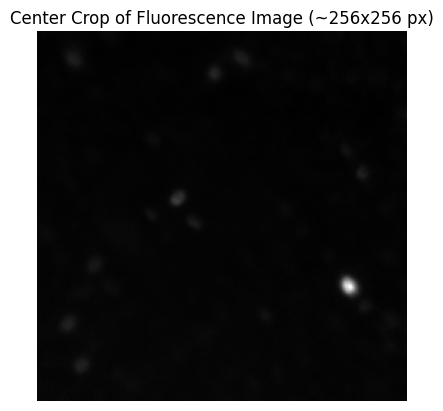

In [4]:
frame_idx = 0  # single frame only
H, W = shape[1], shape[2]
crop_size = 256
center_y, center_x = H // 2, W // 2
y1 = max(center_y - crop_size // 2, 0)
y2 = min(center_y + crop_size // 2, H)
x1 = max(center_x - crop_size // 2, 0)
x2 = min(center_x + crop_size // 2, W)

crop = img_data[frame_idx, y1:y2, x1:x2]
crop = np.array(crop)

plt.imshow(crop, cmap='gray')
plt.title("Center Crop of Fluorescence Image (~256x256 px)")
plt.axis('off')
plt.show()

The center crop above shows fluorescence in a region of the cell monolayer, where brighter areas likely correspond to labeled or electroporated cells.

## Pixel intensity distribution in the crop region

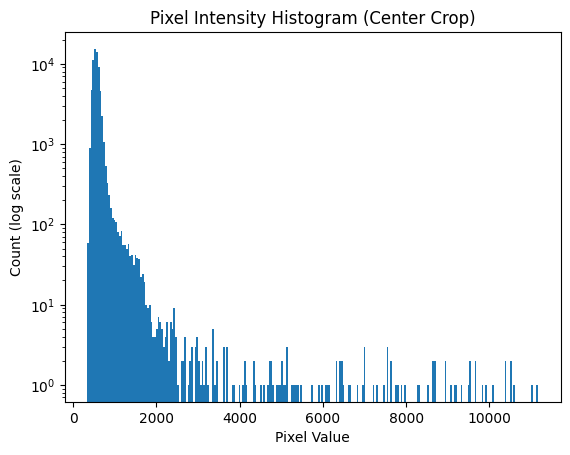

In [5]:
plt.hist(crop.flatten(), bins=256, log=True)
plt.title('Pixel Intensity Histogram (Center Crop)')
plt.xlabel('Pixel Value')
plt.ylabel('Count (log scale)')
plt.show()

The histogram indicates a dominant low-intensity background with a long tail of bright pixels representing cellular structures.  
This confirms good signal-to-noise ratio suitable for detecting transfected cells or membrane permeabilization.

---

This concludes the introductory exploration of Dandiset 001276. Researchers can adapt the code above to load other files, larger regions, or additional channels as needed.